# Análisis de Datos de Fraude en Seguros de Auto

## 1. Análisis Exploratorio de los Datos (EDA)

### 1.1 Carga de Librerías

In [1]:
# Cargamos las librerías a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mostramos todas las columnas
pd.set_option('display.max_columns', None)

### 1.2 Carga de Datos

In [2]:
# Nombramos el dataframe
car_fraud = pd.read_csv('.\..\data\Dataset.csv')

# Mostramos un encabezado de los datos
car_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069420
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455570
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374340


In [3]:
# Mostramos el número de filas, columnas, valores NO nulos y el tipo de datos
car_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

### 1.3 Estadística Descriptiva

In [4]:
# Resumimos las variables numéricas
car_fraud.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,11565.0,2.78,1.28,1.0,2.00,3.00,4.00,5.00
WeekOfMonthClaimed,11565.0,2.70,1.26,1.0,2.00,3.00,4.00,5.00
Age,11560.0,39.90,13.59,0.0,31.00,38.00,49.00,80.00
FraudFound_P,11565.0,0.06,0.24,0.0,0.00,0.00,0.00,1.00
PolicyNumber,11565.0,7710.47,4453.76,1.0,3851.00,7712.00,11542.00,15420.00
RepNumber,11565.0,8.47,4.62,1.0,4.00,8.00,12.00,16.00
Deductible,11565.0,407.62,43.40,300.0,400.00,400.00,400.00,700.00
DriverRating,11559.0,2.49,1.12,1.0,1.00,3.00,3.00,4.00
Year,11565.0,1994.87,0.80,1994.0,1994.00,1995.00,1996.00,1996.00
ClaimSize,11565.0,22955.98,26988.81,0.0,4148.85,8130.99,46299.65,141394.16


In [5]:
# Resuminos las variables categóricas
car_fraud.describe(include = ['O']).T

,count,unique,top,freq
Month,11565,12,Jan,1056
DayOfWeek,11565,7,Monday,2000
Make,11565,19,Pontiac,2899
AccidentArea,11565,2,Urban,10356
DayOfWeekClaimed,11565,8,Monday,2811
MonthClaimed,11565,13,Jan,1084
Sex,11565,2,Male,9768
MaritalStatus,11565,4,Married,7986
Fault,11565,2,Policy Holder,8394
PolicyType,11565,9,Sedan - Collision,4186


### 1.4 Análisis de la Variable Objetivo

In [55]:
# Proporción del fraude respecto al total de reclamaciones
car_fraud.groupby('FraudFound_P').size()

FraudFound_P
0    10880
1      685
dtype: int64

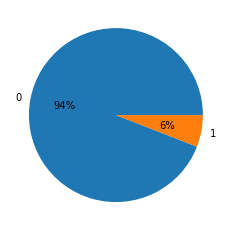

In [28]:
grouped_fraud = car_fraud.groupby('FraudFound_P').count()
grouped_fraud = grouped_fraud['PolicyNumber'].reset_index()
plt.pie(grouped_fraud['PolicyNumber'], autopct='%1.0f%%', labels = grouped_fraud['FraudFound_P'])
plt.show()

#### 1.4.1 Visualización de Variables Categóricas

In [46]:
# Cómo se distribuye el fraude por día de la semana de la reclamación
car_fraud.groupby(['FraudFound_P', 'DayOfWeekClaimed']).count()['PolicyNumber']

FraudFound_P  DayOfWeekClaimed
0             0                      1
              Friday              1714
              Monday              2651
              Saturday              89
              Sunday                37
              Thursday            1890
              Tuesday             2393
              Wednesday           2105
1             Friday               128
              Monday               160
              Saturday               5
              Sunday                 3
              Thursday             110
              Tuesday              152
              Wednesday            127
Name: PolicyNumber, dtype: int64

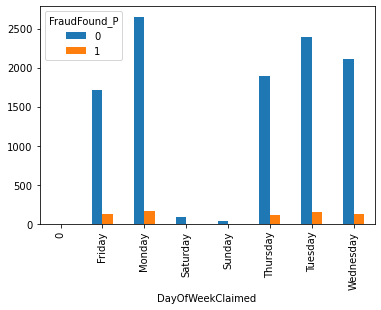

In [41]:
grouped_sex = car_fraud.groupby(['FraudFound_P', 'DayOfWeekClaimed']).count()['PolicyNumber']
grouped_sex.unstack(level=0).plot.bar()
plt.show()

In [42]:
# Cómo se distribuye el fraude por mes de la reclamación
car_fraud.groupby(['FraudFound_P', 'MonthClaimed']).count()['PolicyNumber']

FraudFound_P  MonthClaimed
0             0                  1
              Apr              908
              Aug              776
              Dec              848
              Feb              892
              Jan             1017
              Jul              867
              Jun              908
              Mar              933
              May              961
              Nov              940
              Oct              945
              Sep              884
1             Apr               62
              Aug               70
              Dec               31
              Feb               63
              Jan               67
              Jul               41
              Jun               59
              Mar               72
              May               77
              Nov               33
              Oct               50
              Sep               60
Name: PolicyNumber, dtype: int64

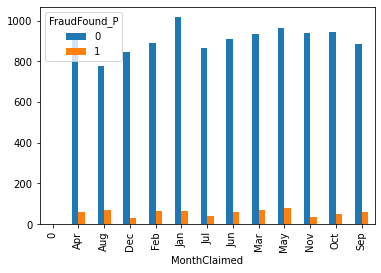

In [43]:
grouped_sex = car_fraud.groupby(['FraudFound_P', 'MonthClaimed']).count()['PolicyNumber']
grouped_sex.unstack(level=0).plot.bar()
plt.show()

In [43]:
# Cómo se distribuye el fraude por sexo del asegurado
car_fraud.groupby(['FraudFound_P', 'Sex']).count()['PolicyNumber']

FraudFound_P  Sex   
0             Female    1724
              Male      9156
1             Female      73
              Male       612
Name: PolicyNumber, dtype: int64

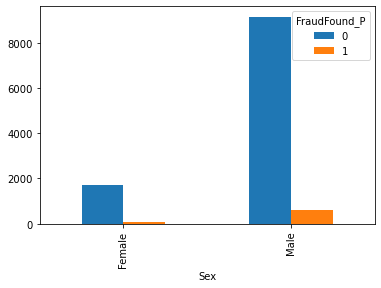

In [10]:
grouped_sex = car_fraud.groupby(['FraudFound_P', 'Sex']).count()['PolicyNumber']
grouped_sex.unstack(level=0).plot.bar()
plt.show()

In [15]:
# Cómo se distribuye el fraude por reporte policial
car_fraud.groupby(['FraudFound_P', 'PoliceReportFiled']).count()['PolicyNumber']

FraudFound_P  PoliceReportFiled
0             No                   10563
              Yes                    317
1             No                     672
              Yes                     13
Name: PolicyNumber, dtype: int64

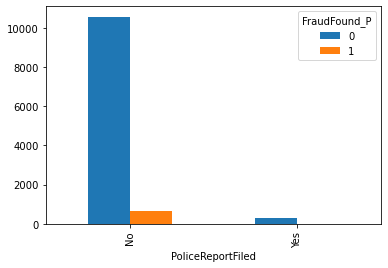

In [11]:
grouped_sex = car_fraud.groupby(['FraudFound_P', 'PoliceReportFiled']).count()['PolicyNumber']
grouped_sex.unstack(level=0).plot.bar()
plt.show()

In [12]:
# Cómo se distribuye el fraude por testigo presente
car_fraud.groupby(['FraudFound_P', 'WitnessPresent']).count()['PolicyNumber']

FraudFound_P  WitnessPresent
0             No                10814
              Yes                  66
1             No                  683
              Yes                   2
Name: PolicyNumber, dtype: int64

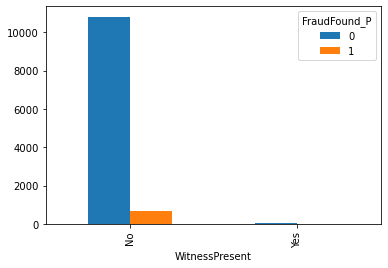

In [13]:
grouped_sex = car_fraud.groupby(['FraudFound_P', 'WitnessPresent']).count()['PolicyNumber']
grouped_sex.unstack(level=0).plot.bar()
plt.show()

#### 1.4.2 Visualización de Variables Numéricas

In [102]:
# Creamos un dataframe solo para fraude encontrado
fraud_found = car_fraud[car_fraud['FraudFound_P'] == 1]
fraud_found.shape

(685, 34)

Text(0.5, 0, 'Age')

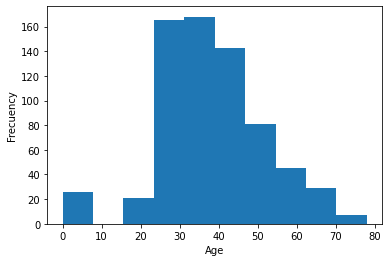

In [15]:
# Cómo se distribuye el fraude por edad del asegurado
fraud_found['Age'].plot.hist()
plt.ylabel('Frecuency')
plt.xlabel('Age')

Text(0.5, 0, 'ClaimSize')

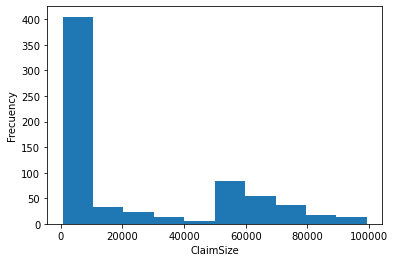

In [16]:
# Cómo se distribuye el fraude por tamaño de la reclamación
fraud_found['ClaimSize'].plot.hist()
plt.ylabel('Frecuency')
plt.xlabel('ClaimSize')